In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [80]:
# read data
file1= pd.read_csv("Fraud_transaction/fraudTrain.csv")
file2= pd.read_csv("Fraud_transaction/fraudTest.csv")


#About the Dataset

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Data Dictionary

    trans_date_trans_time -> Transaction time stamp
    cc_num -> Credit card number
    merchant -> merchant name
    category -> transaction category
    amt -> Transaction amount
    first -> First name of card holder
    last -> Last name of card holder
    gender -> Sex of card holder
    street -> transaction address
    city -> transaction city
    state -> transaction state
    zip -> transaction zipcode
    lat -> transaction lattitude
    long -> transaction longitude
    city_pop -> Population of the city
    job -> job of the card holder
    dob -> date of birth of card holder
    trans_num -> transaction number of transaction
    unix_time -> time in unix format
    merch_lat -> lattitude of the merchant
    merch_long -> longitude of merchant
    is_fraud -> nature of transaction (fraud or not fraud)



In [81]:
def load_original_data():
    return pd.concat([file1,file2], axis=0)

In [82]:
fraud=load_original_data()
fraud

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [83]:
fraud['trans_num'].value_counts()

0b242abb623afc578575680df30655b9    1
ad44105b2defec28687e0c0c00db0dd2    1
fff81009b323191d0a427a2af21e5bc7    1
2341854d7594722011878c08ba3819dd    1
f7f00d638b16a8b1045d8a8978b607bd    1
                                   ..
74745c7e44a5172e919b2ea2538d0edb    1
71d44820f944faa2ed912043e859df48    1
986d5219c856c1ddcafe1a4ad35b844e    1
cf4fca8a9847c75240202201324dd34f    1
1765bb45b3aa3224b4cdcb6e7a96cee3    1
Name: trans_num, Length: 1852394, dtype: int64

In [84]:
fraud_df=fraud.reset_index()


In [85]:
def drop_columns(fraud_df) :
    fraud_df.drop(columns=["index","Unnamed: 0",'zip'], inplace=True)
    return fraud_df

In [86]:
fraud_df=drop_columns(fraud_df)


In [87]:
fraud_df=fraud_df.drop_duplicates()
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0



## Exploratory Data Analysis

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

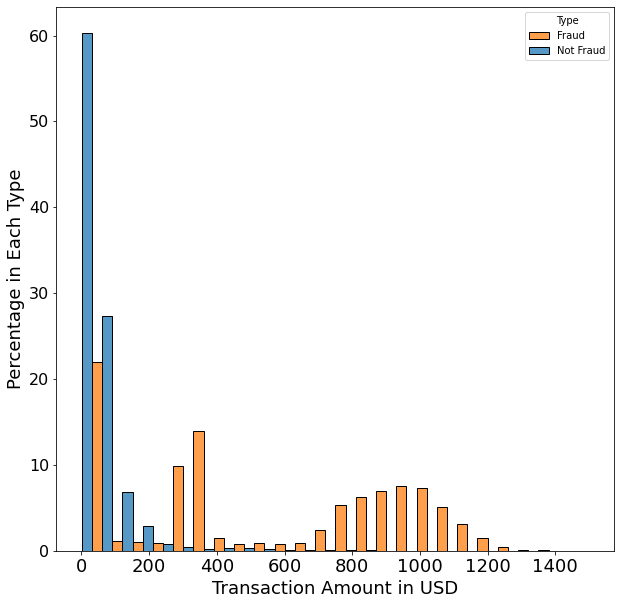

In [118]:
#amount vs fraud
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(x='amt',data=fraud_df[fraud_df.amt<=1500],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type',fontsize=18)
ax.set_xlabel('Transaction Amount in USD',fontsize=18)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(fontsize=18) 
plt.yticks(fontsize=16) 


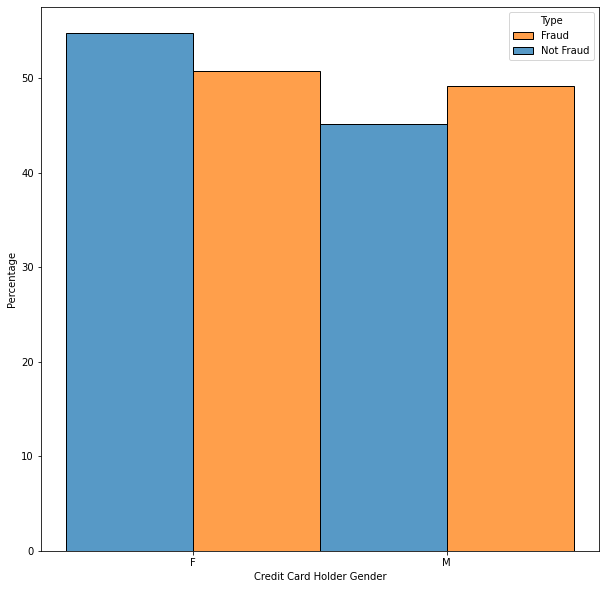

In [246]:
#Gender vs Fraud
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(x='gender',data=fraud_df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

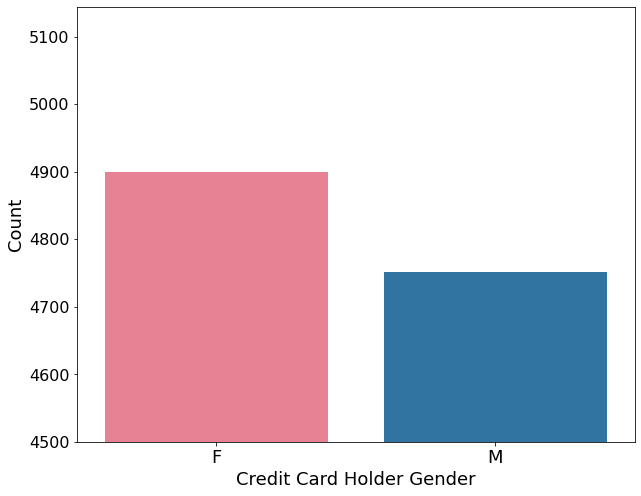

In [117]:
#fraud = sns.load_dataset('titanic')
fig, ax = plt.subplots(figsize=(10,8))
g=sns.countplot(x = 'gender',
              data = fraud_yes,
              order = fraud_yes.gender.value_counts().index, palette=["#f77189","#1f77b4"])
g.set(ylim=(4500, None))
plt.xticks(fontsize=18) 
plt.yticks(fontsize=16) 
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Credit Card Holder Gender',fontsize=18)
plt.show()


In [108]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [105]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [107]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [275]:
fraud_df['state'].value_counts()

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

In [88]:
high_trans_states = fraud_df.state.value_counts().head(10).index.tolist()
high_trans_states 


['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO']

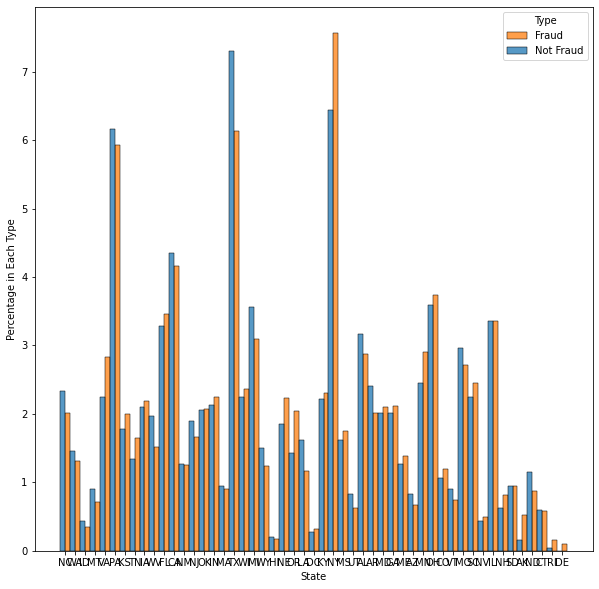

In [248]:
#City_population opulation vs Fraud
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(x='state',data=fraud_df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=5)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('State')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [89]:
fraud_df_numerical = fraud_df[['amt','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']]
fraud_df_numerical

,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long
0,4.97,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315
1,107.23,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462
2,220.11,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481
3,45.00,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071
4,41.96,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...
1852389,43.77,40.4931,-91.8912,519,1966-02-13,1388534347,39.946837,-91.333331
1852390,111.84,29.0393,-95.4401,28739,1999-12-27,1388534349,29.661049,-96.186633
1852391,86.88,46.1966,-118.9017,3684,1981-11-29,1388534355,46.658340,-119.715054
1852392,7.99,44.6255,-116.4493,129,1965-12-15,1388534364,44.470525,-117.080888


<AxesSubplot:>

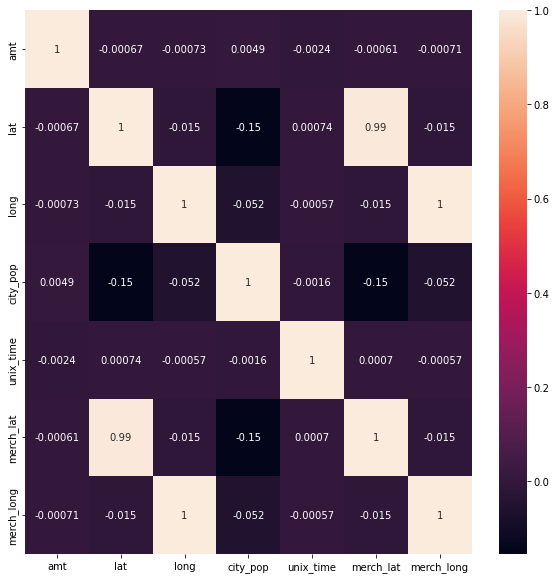

In [327]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(fraud_df_numerical.corr(),annot=True)

In [90]:
fraud_df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [91]:
df=pd.get_dummies(fraud_df['gender'])


In [92]:
fraud=pd.concat([df,fraud_df],axis=1)


In [93]:
fraud['dob'].value_counts()

1977-03-23    8044
1988-09-15    6574
1981-08-29    6571
1955-05-06    5121
1960-01-13    4395
              ... 
1944-06-17       7
1932-05-09       7
1936-05-04       7
1963-02-26       7
1998-08-02       6
Name: dob, Length: 984, dtype: int64

In [94]:
fraud['year'] = pd.DatetimeIndex(fraud['dob']).year


In [95]:
fraud['age']=2020-fraud['year']


In [18]:
fraud

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,age
0,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1988,32
1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1978,42
2,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1962,58
3,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1967,53
4,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1986,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,1966,54
1852390,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,1999,21
1852391,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,1981,39
1852392,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,1965,55


In [96]:
fraud_new=fraud.drop(['year'], axis=1)
fraud_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,32
1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42
2,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,58
3,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,53
4,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,54
1852390,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21
1852391,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39
1852392,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,55


In [97]:
fraud_new['trans_time'] = pd.DatetimeIndex(fraud_new['trans_date_trans_time']).time
fraud_new['trans_month'] = pd.DatetimeIndex(fraud_new['trans_date_trans_time']).month
fraud_new['trans_day'] = pd.DatetimeIndex(fraud_new['trans_date_trans_time']).day
fraud_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day
0,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,32,00:00:18,1,1
1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42,00:00:44,1,1
2,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,58,00:00:51,1,1
3,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,53,00:01:16,1,1
4,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,34,00:03:06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,54,23:59:07,12,31
1852390,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21,23:59:09,12,31
1852391,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39,23:59:15,12,31
1852392,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,55,23:59:24,12,31


In [98]:
#Convert trans_time into datetime
from datetime import datetime
fraud_new['trans_date_trans_time'] = pd.to_datetime(fraud_new['trans_date_trans_time'])
fraud_new['trans_hour'] = fraud_new['trans_date_trans_time'].dt.hour
fraud_new.head()

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour
0,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,32,00:00:18,1,1,0
1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42,00:00:44,1,1,0
2,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,58,00:00:51,1,1,0
3,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,53,00:01:16,1,1,0
4,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,34,00:03:06,1,1,0


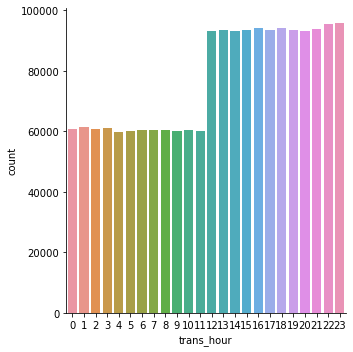

In [290]:
sns.catplot(data=fraud_new,kind='count',x='trans_hour')

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

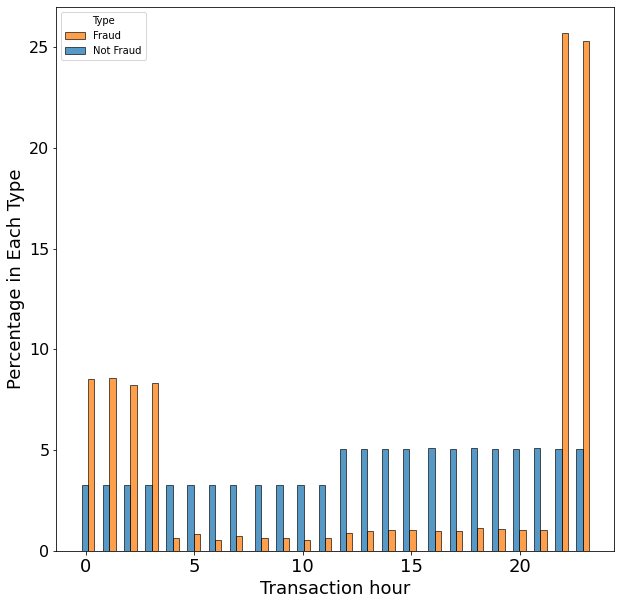

In [152]:
#Hour vs fraud
plt.figure(figsize=(10,10))
ax=sns.histplot(x=fraud_new['trans_hour'],data=fraud_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=3)
ax.set_ylabel('Percentage in Each Type',fontsize=18)
ax.set_xlabel('Transaction hour',fontsize=18)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(fontsize=18) 
plt.yticks(fontsize=16)


In [99]:
fraud_new['trans_day_of_week'] = fraud_new['trans_date_trans_time'].dt.day_name()
fraud_new['trans_day_of_week']

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
             ...   
1852389    Thursday
1852390    Thursday
1852391    Thursday
1852392    Thursday
1852393    Thursday
Name: trans_day_of_week, Length: 1852394, dtype: object

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

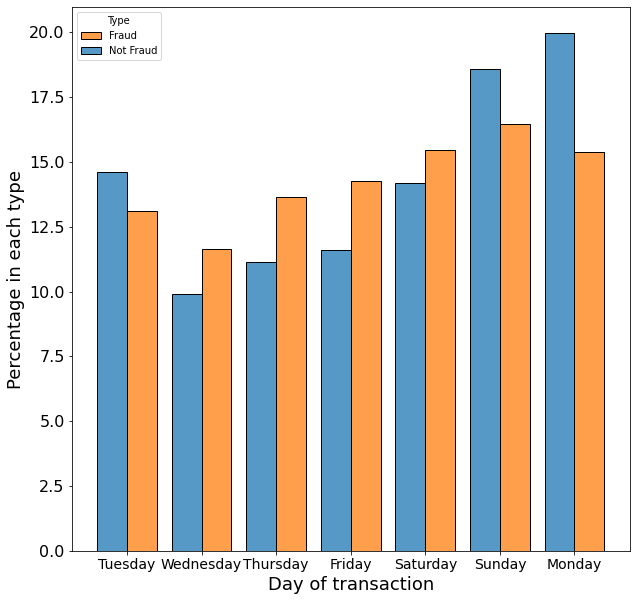

In [160]:
# Day vs fraud
plt.figure(figsize=(10,10))
ax=sns.histplot(x=fraud_new['trans_day_of_week'],data=fraud_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=0.8)
ax.set_ylabel('Percentage in each type',fontsize=18)
ax.set_xlabel('Day of transaction',fontsize=18)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(fontsize=14) 
plt.yticks(fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


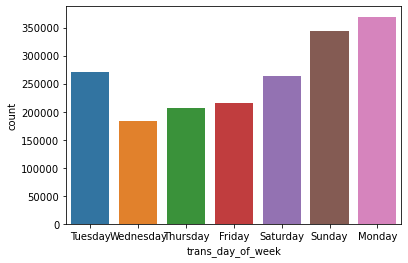

In [294]:
plt.figure(figsize=(10,10))
plot = sns.countplot(fraud_new.trans_day_of_week)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


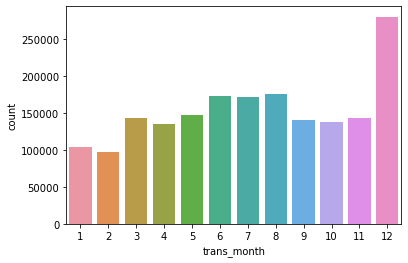

In [295]:
plot = sns.countplot(fraud_new.trans_month)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

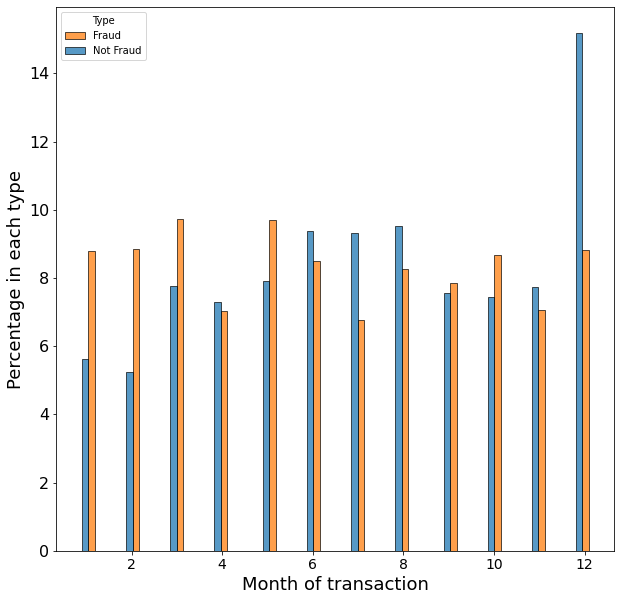

In [162]:
# Month vs fraud
plt.figure(figsize=(10,10))
ax=sns.histplot(x=fraud_new['trans_month'],data=fraud_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=3)
ax.set_ylabel('Percentage in each type',fontsize=18)
ax.set_xlabel('Month of transaction',fontsize=18)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(fontsize=14) 
plt.yticks(fontsize=16)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

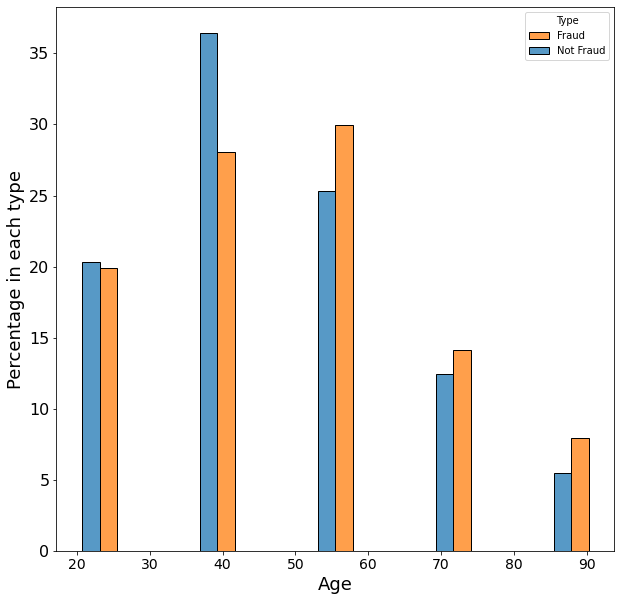

In [169]:
# Age vs fraud
plt.figure(figsize=(10,10))
ax=sns.histplot(x=fraud_new['age'],data=fraud_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=0.3,bins=5)
ax.set_ylabel('Percentage in each type',fontsize=18)
ax.set_xlabel('Age',fontsize=18)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(fontsize=14) 
plt.yticks(fontsize=16)

In [100]:
for i in range(len(fraud_new.trans_hour)):
    if fraud_new.trans_hour[i] > 0 and fraud_new.trans_hour[i]<= 11:
        fraud_new.trans_hour[i] = '00-11 hours' #first half of the day
    else:
        fraud_new.trans_hour[i] = '12-23 hours' #second half of the day

C:\Users\User\AppData\Local\Temp\ipykernel_11360\165509264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_new.trans_hour[i] = '12-23 hours' #second half of the day


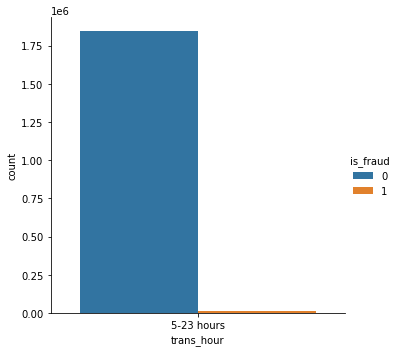

In [70]:
sns.catplot(data=fraud_new,kind='count',x='trans_hour',hue='is_fraud')

In [101]:
fraud_new['unix_time']=fraud_new['unix_time']+86400000

In [102]:
#!/usr/bin/env python
from datetime import datetime
import tzlocal  # $ pip install tzlocal

fraud_new['unix_time']=(pd.to_datetime(fraud_new['unix_time'],unit='s'))
fraud_new['unix_time'].max()

Timestamp('2016-09-26 23:59:34')

In [103]:
fraud_new['trans_date_trans_time'].max()

Timestamp('2020-12-31 23:59:34')

In [104]:
for i in range(len(fraud_new.age)):
    if fraud_new.age[i] <= 30:
        fraud_new.age[i] = '0'
    elif fraud_new.age[i] > 30 and fraud_new.age[i] <= 45:
        fraud_new.age[i] = '1'
    elif fraud_new.age[i] > 45 and fraud_new.age[i] <= 60:
        fraud_new.age[i] = '2'
    elif fraud_new.age[i] > 60 and fraud_new.age[i] <= 75:
        fraud_new.age[i] = '3'
    else:
        fraud_new.age[i] = '4'

C:\Users\User\AppData\Local\Temp\ipykernel_11360\4179943061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_new.age[i] = '1'


In [27]:
#fraud_new['age'] = pd.qcut(fraud_new['age'], [0, 0.25, 0.5, 0.75, 1], labels=['17-37', '37-57', '57-77', '77-98'])
#fraud_new['age']

In [105]:
fraud_yes=fraud_new.loc[fraud_new['is_fraud']==1] 
#fraud_yes

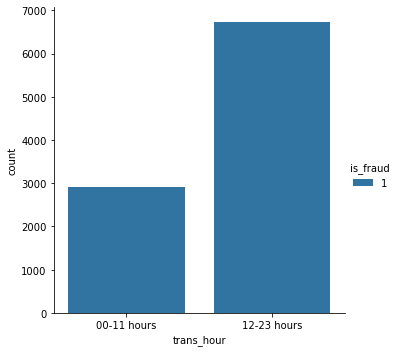

In [305]:
sns.catplot(data=fraud_yes,kind='count',x='trans_hour',hue='is_fraud')

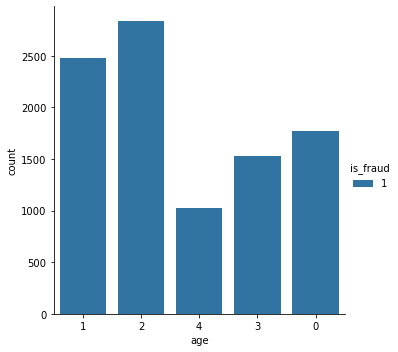

In [306]:
sns.catplot(data=fraud_yes,kind='count',x='age',hue='is_fraud')

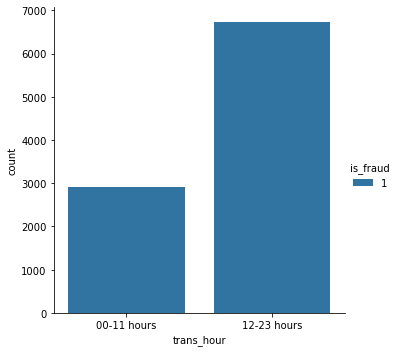

In [307]:
sns.catplot(data=fraud_yes,kind='count',x='trans_hour',hue='is_fraud')

In [106]:
df_hour=pd.get_dummies(fraud_new['trans_hour'])

In [107]:
fraud_hour=pd.concat([df_hour,fraud_new],axis=1)
fraud_hour

,00-11 hours,12-23 hours,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,...,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour,trans_day_of_week
0,0,1,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,...,2014-09-27 00:00:18,36.011293,-82.048315,0,1,00:00:18,1,1,12-23 hours,Tuesday
1,0,1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,...,2014-09-27 00:00:44,49.159047,-118.186462,0,1,00:00:44,1,1,12-23 hours,Tuesday
2,0,1,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,...,2014-09-27 00:00:51,43.150704,-112.154481,0,2,00:00:51,1,1,12-23 hours,Tuesday
3,0,1,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,...,2014-09-27 00:01:16,47.034331,-112.561071,0,2,00:01:16,1,1,12-23 hours,Tuesday
4,0,1,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,...,2014-09-27 00:03:06,38.674999,-78.632459,0,1,00:03:06,1,1,12-23 hours,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,...,2016-09-26 23:59:07,39.946837,-91.333331,0,2,23:59:07,12,31,12-23 hours,Thursday
1852390,0,1,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,...,2016-09-26 23:59:09,29.661049,-96.186633,0,0,23:59:09,12,31,12-23 hours,Thursday
1852391,0,1,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,...,2016-09-26 23:59:15,46.658340,-119.715054,0,1,23:59:15,12,31,12-23 hours,Thursday
1852392,0,1,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,...,2016-09-26 23:59:24,44.470525,-117.080888,0,2,23:59:24,12,31,12-23 hours,Thursday


In [77]:
fraud_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   5-23 hours             uint8         
 1   F                      uint8         
 2   M                      uint8         
 3   trans_date_trans_time  datetime64[ns]
 4   cc_num                 int64         
 5   merchant               object        
 6   category               object        
 7   amt                    float64       
 8   first                  object        
 9   last                   object        
 10  gender                 object        
 11  street                 object        
 12  city                   object        
 13  state                  object        
 14  lat                    float64       
 15  long                   float64       
 16  city_pop               int64         
 17  job                    object        
 18  dob                   

In [108]:
fraud_hour['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

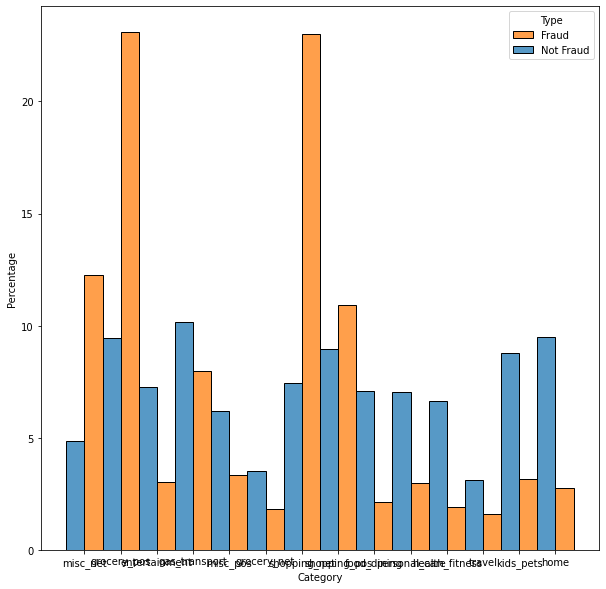

In [312]:
#Category vs Fraud

plt.figure(figsize=(10,10))
ax=sns.histplot(x='category',data=fraud_hour, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [109]:
fraud_yes['is_fraud'].value_counts()

1    9651
Name: is_fraud, dtype: int64

In [110]:
high_trans_cities = fraud_yes.city.value_counts().head(10).index.tolist()
high_trans_cities

['Dallas',
 'Houston',
 'Birmingham',
 'New York City',
 'Camden',
 'Allentown',
 'Warren',
 'Detroit',
 'Washington',
 'Arcadia']

In [111]:
fraud_hour['city'].value_counts()

Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Chattanooga       7
Karns City        7
Vacaville         7
Streator          7
Wever             6
Name: city, Length: 906, dtype: int64

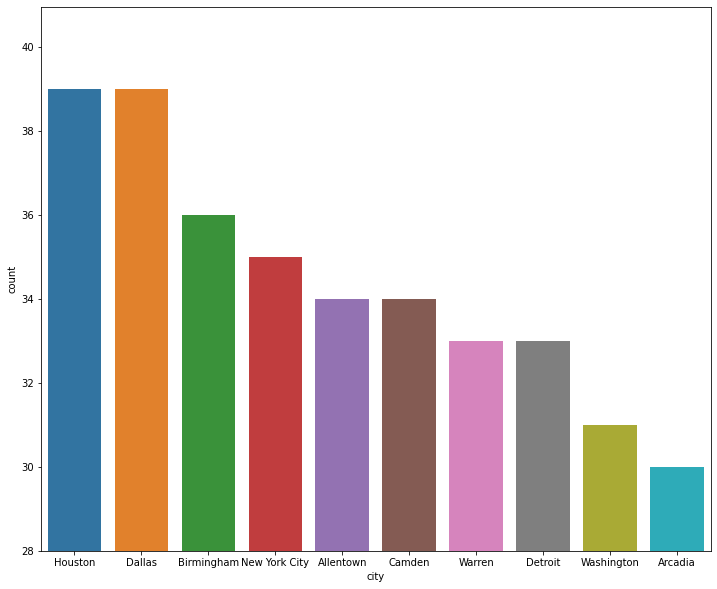

In [124]:
#fraud = sns.load_dataset('titanic')
fig, ax = plt.subplots(figsize=(12,10))
g=sns.countplot(x = 'city',
              data = fraud_yes,
              order = fraud_yes[fraud_yes.city.isin(high_trans_cities)].city.value_counts().index)
g.set(ylim=(28, None))
plt.show()

In [112]:
high_trans_category = fraud_hour.category.value_counts().head(10).index.tolist()
high_trans_category

['gas_transport',
 'grocery_pos',
 'home',
 'shopping_pos',
 'kids_pets',
 'shopping_net',
 'entertainment',
 'food_dining',
 'personal_care',
 'health_fitness']

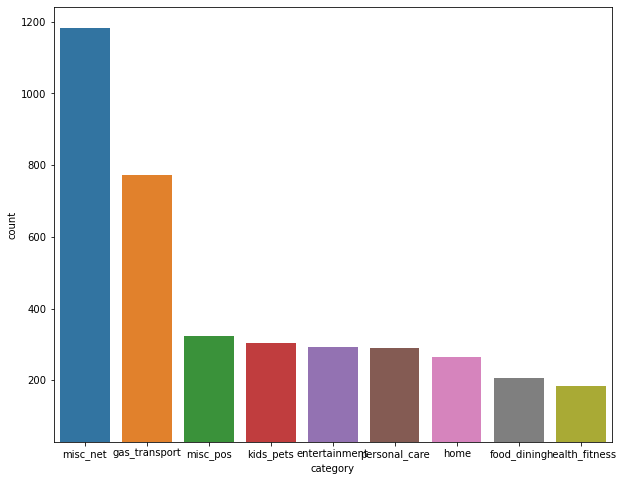

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
g=sns.countplot(x = 'category',
              data = fraud_yes,
              order = fraud_yes[fraud_yes.category.isin(high_trans_category)].category.value_counts().index)
g.set(ylim=(28, None))
plt.show()

In [113]:
def clean_category(x):
     if x in ['shopping_pos','shopping_net','grocery_pos','grocery_net']:
        return 'shopping'
     else:
        return x

In [114]:
fraud_hour['category'] = list(map(clean_category, fraud_hour['category'])) 


In [115]:
fraud_yes['category'] = list(map(clean_category, fraud_yes['category'])) 

C:\Users\User\AppData\Local\Temp\ipykernel_11360\2084850859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_yes['category'] = list(map(clean_category, fraud_yes['category']))


In [116]:
fraud_yes['category'].value_counts()

shopping          5678
misc_net          1182
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
travel             156
Name: category, dtype: int64

In [209]:
high_trans_category = fraud_yes.category.value_counts().head(7).index.tolist()
high_trans_category

['shopping',
 'misc_net',
 'gas_transport',
 'misc_pos',
 'kids_pets',
 'entertainment',
 'personal_care']

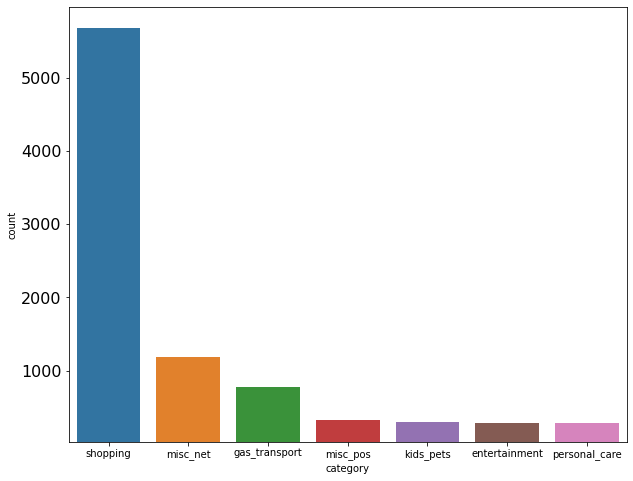

In [166]:
fig, ax = plt.subplots(figsize=(10,8))
g=sns.countplot(x = 'category',
              data = fraud_yes,
              order = fraud_yes[fraud_yes.category.isin(high_trans_category)].category.value_counts().index)
g.set(ylim=(28, None))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=16)
plt.show()

In [117]:
#Encoding category
def category(x):
    if x in ['shopping']:
        return 0
    elif x in ['gas_transport']:
        return 1
    elif x in ['home']:
        return 2
    elif x in ['kids_pets']:
        return 3
    elif x in ['entertainment']:
        return 4
    elif x in ['food_dining']:
        return 5
    elif x in ['personal_care']:
        return 6
    elif x in ['health_fitness']:
        return 7
    elif x in ['misc_pos']:
        return 8
    elif x in ['misc_net']:
        return 9
    elif x in ['travel']:
        return 10
    else:
        return 11

In [118]:
fraud_hour['category'] = list(map(category, fraud_hour['category'])) 
fraud_hour

,00-11 hours,12-23 hours,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,...,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour,trans_day_of_week
0,0,1,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",9,4.97,Jennifer,...,2014-09-27 00:00:18,36.011293,-82.048315,0,1,00:00:18,1,1,12-23 hours,Tuesday
1,0,1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",0,107.23,Stephanie,...,2014-09-27 00:00:44,49.159047,-118.186462,0,1,00:00:44,1,1,12-23 hours,Tuesday
2,0,1,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,4,220.11,Edward,...,2014-09-27 00:00:51,43.150704,-112.154481,0,2,00:00:51,1,1,12-23 hours,Tuesday
3,0,1,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",1,45.00,Jeremy,...,2014-09-27 00:01:16,47.034331,-112.561071,0,2,00:01:16,1,1,12-23 hours,Tuesday
4,0,1,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,8,41.96,Tyler,...,2014-09-27 00:03:06,38.674999,-78.632459,0,1,00:03:06,1,1,12-23 hours,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,7,43.77,Michael,...,2016-09-26 23:59:07,39.946837,-91.333331,0,2,23:59:07,12,31,12-23 hours,Thursday
1852390,0,1,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,3,111.84,Jose,...,2016-09-26 23:59:09,29.661049,-96.186633,0,0,23:59:09,12,31,12-23 hours,Thursday
1852391,0,1,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,3,86.88,Ann,...,2016-09-26 23:59:15,46.658340,-119.715054,0,1,23:59:15,12,31,12-23 hours,Thursday
1852392,0,1,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,10,7.99,Eric,...,2016-09-26 23:59:24,44.470525,-117.080888,0,2,23:59:24,12,31,12-23 hours,Thursday


In [119]:
fraud_hour[['lat','long','merch_lat','merch_long']]


,lat,long,merch_lat,merch_long
0,36.0788,-81.1781,36.011293,-82.048315
1,48.8878,-118.2105,49.159047,-118.186462
2,42.1808,-112.2620,43.150704,-112.154481
3,46.2306,-112.1138,47.034331,-112.561071
4,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...
1852389,40.4931,-91.8912,39.946837,-91.333331
1852390,29.0393,-95.4401,29.661049,-96.186633
1852391,46.1966,-118.9017,46.658340,-119.715054
1852392,44.6255,-116.4493,44.470525,-117.080888


In [ ]:
#!pip install haversine

In [ ]:
#import haversine as hs

In [ ]:
#fraud_hour["loc1"] = fraud_hour["lat"] + fraud_hour["long"]
#fraud_hour["loc2"] = fraud_hour["merch_lat"] + fraud_hour["merch_long"]
#fraud_hour

In [ ]:
#!pip install geopy

In [ ]:
#import geopy.distance

In [ ]:
#geopy.distance.geodesic((lat1, lon1)

In [ ]:
#fraud_hour['distance'] = fraud_hour.apply((lambda row: geopy.distance.geodesic((row['lat'], row['long']),(row['merch_lat'], row['merch_long'])).km),axis=1)

In [ ]:
#fraud_hour.distance.max()

In [ ]:
#fraud_hour['distance']=distance
#fraud_hour['distance'].value_counts()

In [120]:
fraud_hour['trans_day_of_week'].value_counts()

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: trans_day_of_week, dtype: int64

In [121]:
def encoded_day(x):
    if x in ['Tuesday']:
        return'0'
    elif x in ['Wednesday']:
        return '1'
    elif x in ['Thursday']:
        return '2'
    elif x in ['Friday']:
        return '3'
    elif x in ['Saturday']:
        return '4'
    elif x in ['Sunday']:
        return '5'
    else:
        return '6'

In [122]:
fraud_hour['trans_day_of_week'] = list(map(encoded_day, fraud_hour['trans_day_of_week'])) 
fraud_hour

,00-11 hours,12-23 hours,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,...,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour,trans_day_of_week
0,0,1,1,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",9,4.97,Jennifer,...,2014-09-27 00:00:18,36.011293,-82.048315,0,1,00:00:18,1,1,12-23 hours,0
1,0,1,1,0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",0,107.23,Stephanie,...,2014-09-27 00:00:44,49.159047,-118.186462,0,1,00:00:44,1,1,12-23 hours,0
2,0,1,0,1,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,4,220.11,Edward,...,2014-09-27 00:00:51,43.150704,-112.154481,0,2,00:00:51,1,1,12-23 hours,0
3,0,1,0,1,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",1,45.00,Jeremy,...,2014-09-27 00:01:16,47.034331,-112.561071,0,2,00:01:16,1,1,12-23 hours,0
4,0,1,0,1,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,8,41.96,Tyler,...,2014-09-27 00:03:06,38.674999,-78.632459,0,1,00:03:06,1,1,12-23 hours,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,1,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,7,43.77,Michael,...,2016-09-26 23:59:07,39.946837,-91.333331,0,2,23:59:07,12,31,12-23 hours,2
1852390,0,1,0,1,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,3,111.84,Jose,...,2016-09-26 23:59:09,29.661049,-96.186633,0,0,23:59:09,12,31,12-23 hours,2
1852391,0,1,1,0,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,3,86.88,Ann,...,2016-09-26 23:59:15,46.658340,-119.715054,0,1,23:59:15,12,31,12-23 hours,2
1852392,0,1,0,1,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,10,7.99,Eric,...,2016-09-26 23:59:24,44.470525,-117.080888,0,2,23:59:24,12,31,12-23 hours,2


In [123]:
fraud_hour['job'].value_counts()

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: job, Length: 497, dtype: int64

In [124]:
fraud_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   00-11 hours            uint8         
 1   12-23 hours            uint8         
 2   F                      uint8         
 3   M                      uint8         
 4   trans_date_trans_time  datetime64[ns]
 5   cc_num                 int64         
 6   merchant               object        
 7   category               int64         
 8   amt                    float64       
 9   first                  object        
 10  last                   object        
 11  gender                 object        
 12  street                 object        
 13  city                   object        
 14  state                  object        
 15  lat                    float64       
 16  long                   float64       
 17  city_pop               int64         
 18  job                   

The features 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long' have been asumed to provide no significant information in the model building phase. Hence, they along with the original features that have been encoded have been dropped from the dataset.

In [125]:
fraud_num= fraud_hour[['amt','F','M','age','00-11 hours','12-23 hours','trans_day_of_week','trans_month','category','cc_num']]
fraud_num

,amt,F,M,age,00-11 hours,12-23 hours,trans_day_of_week,trans_month,category,cc_num
0,4.97,1,0,1,0,1,0,1,9,2703186189652095
1,107.23,1,0,1,0,1,0,1,0,630423337322
2,220.11,0,1,2,0,1,0,1,4,38859492057661
3,45.00,0,1,2,0,1,0,1,1,3534093764340240
4,41.96,0,1,1,0,1,0,1,8,375534208663984
...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,0,1,2,0,1,2,12,7,30560609640617
1852390,111.84,0,1,0,0,1,2,12,3,3556613125071656
1852391,86.88,1,0,1,0,1,2,12,3,6011724471098086
1852392,7.99,0,1,2,0,1,2,12,10,4079773899158


<AxesSubplot:>

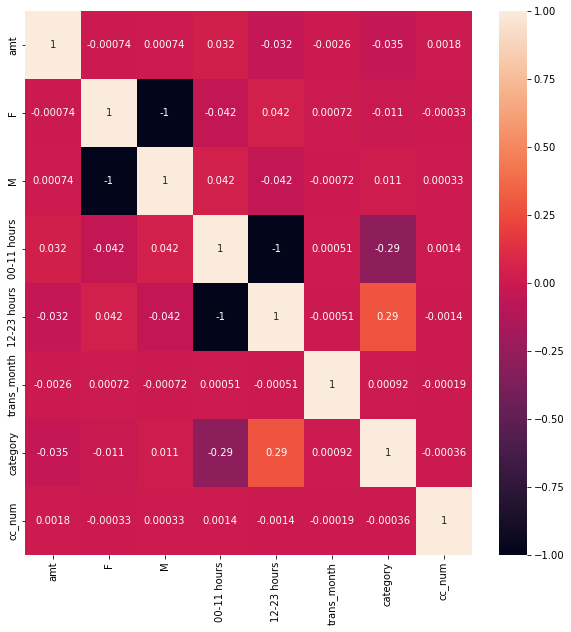

In [165]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(fraud_num.corr(),annot=True)

In [126]:
fraud["is_fraud"].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [127]:

#plt.pie(fraud["is_fraud"])

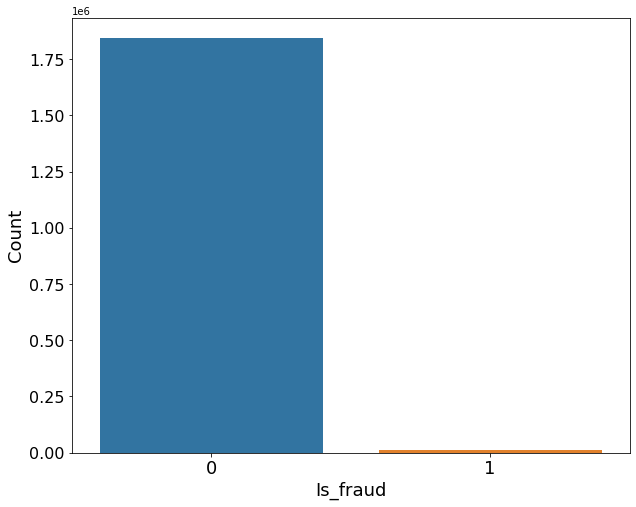

In [265]:
fig, ax = plt.subplots(figsize=(10,8))
g=sns.countplot(x = 'is_fraud',
              data = fraud_df)
#g.set(ylim=(28, None))
plt.xticks(fontsize=18) 
plt.yticks(fontsize=16)

ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Is_fraud',fontsize=18)
plt.show()

In [219]:
#Data is highly unbalanced

In [225]:
(1-(1842743/len(fraud["is_fraud"])))*100 # only 0.5% of transactions are fradulent 

0.5210014716091727

## Upsampling using SMOTE

In [128]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [129]:
y = fraud["is_fraud"]
X =fraud_num

## Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [136]:
len(X_test)

370479

## Decision Tree

In [137]:
X_sm_d_train, y_sm_d_train = smote.fit_resample(X_train, y_train)

In [138]:
X_test, y_test = (X_test, y_test)

,Error_metric,Train,Test
0,Accuracy,0.92,0.98
1,Precision,0.98,0.18
2,Recall,0.86,0.76


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


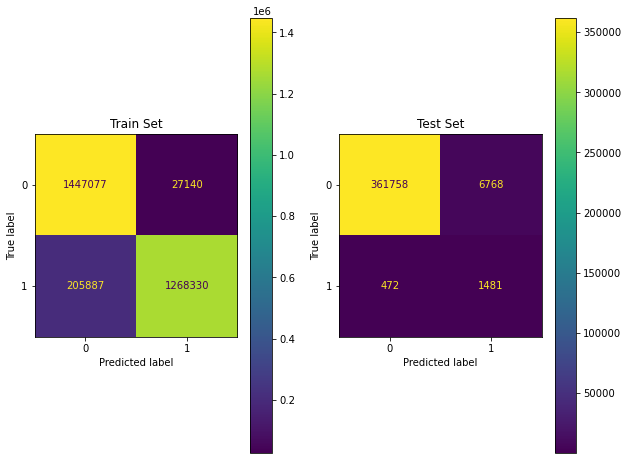

In [231]:

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_sm_d_train, y_sm_d_train)

y_pred_train_dt = model.predict(X_sm_d_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_d_train, y_pred_train_dt),
                                         precision_score(y_sm_d_train, y_pred_train_dt),
                                         recall_score(y_sm_d_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(10,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_sm_d_train,y_sm_d_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [293]:
def evaluate_classification_model(y_sm_d_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_d_train, y_pred_train),
                                         precision_score(y_sm_d_train, y_pred_train),
                                         recall_score(y_sm_d_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_sm_d_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [295]:
full = pd.DataFrame()
models = {'max_depth': [] }
for d in range(2,11):
    depth = DecisionTreeClassifier(max_depth=d)
    depth.fit(X_sm_d_train, y_sm_d_train)
    models['max_depth'] = [d, depth]
    y_pred_train_dt = depth.predict(X_sm_d_train)
    y_pred_test_dt  = depth.predict(X_test)
    performance_dt, _, _ = evaluate_classification_model(y_sm_d_train, y_pred_train_dt, y_test, y_pred_test_dt)
    temp = pd.DataFrame({'max_depth': [d]*3, 'Error_metric': performance_dt['Error_metric'],
                         'Train': performance_dt['Train'], 'Test': performance_dt['Test']})
    full = pd.concat([full,temp], axis=0)
full

,max_depth,Error_metric,Train,Test
0,2,Accuracy,0.87,0.97
1,2,Precision,0.96,0.11
2,2,Recall,0.77,0.76
0,3,Accuracy,0.87,0.93
1,3,Precision,0.93,0.06
2,3,Recall,0.81,0.76
0,4,Accuracy,0.88,0.97
1,4,Precision,0.97,0.13
2,4,Recall,0.79,0.76
0,5,Accuracy,0.89,0.94




Precision and recall numbers depend on the actual probability of fraud in your data. Generally fraudulent cases are very small in number => Precision might be low, but recall should be high.

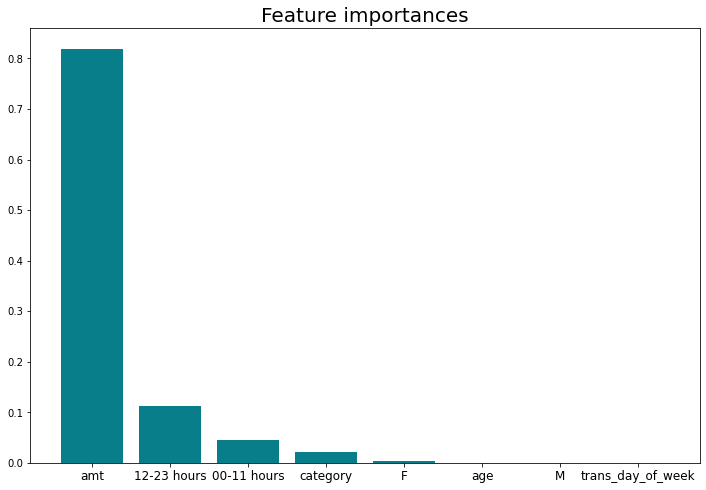

In [238]:
plt.figure(figsize=(12,8))
#plt.barh(X.columns,model.feature_importances_)
features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(model.feature_importances_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
plt.bar(x=features_importances['Attribute'][0:8], height=features_importances['Importance'][0:8], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(fontsize=12)
plt.show()

# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9,min_samples_leaf=20,max_features=None,n_estimators=200,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_sm_d_train, y_sm_d_train)
print(clf.score(X_sm_d_train, y_sm_d_train))
print(clf.score(X_test, y_test))


In [247]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=9,min_samples_leaf=20,max_features=None,n_estimators=200,
                             bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_sm_d_train, y_sm_d_train, cv=5)
cross_val_scores

,Error_metric,Train,Test
0,Accuracy,0.936900,0.965175
1,Precision,0.962850,0.120906
2,Recall,0.908868,0.894009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


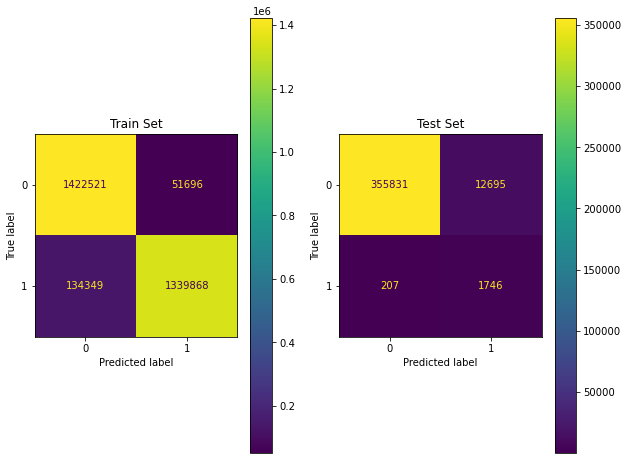

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9,min_samples_leaf=20,max_features=None,n_estimators=200,
                             bootstrap=True,oob_score=True, random_state=0)

clf.fit(X_sm_d_train, y_sm_d_train)

y_pred_train_dt = clf.predict(X_sm_d_train)
y_pred_test_dt = clf.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_d_train, y_pred_train_dt),
                                         precision_score(y_sm_d_train, y_pred_train_dt),
                                         recall_score(y_sm_d_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(10,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(clf,X_sm_d_train,y_sm_d_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(clf,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [140]:
len(y_test), len(y_pred_test_dt)

(370479, 370479)

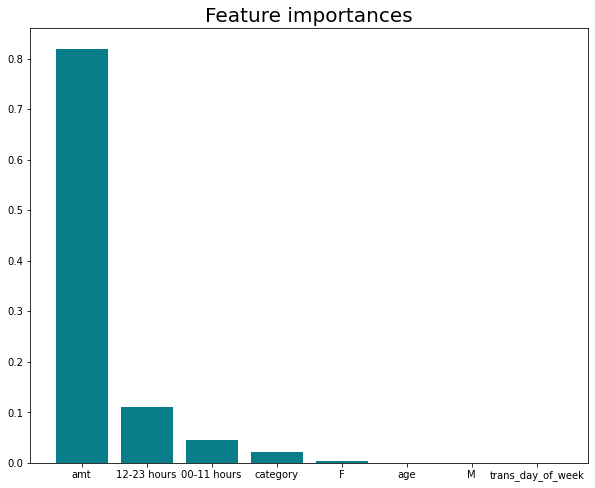

In [243]:
plt.figure(figsize=(10,8))
#plt.barh(X.columns,model.feature_importances_)
features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(model.feature_importances_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
plt.bar(x=features_importances['Attribute'][0:8], height=features_importances['Importance'][0:8], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [59]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [60]:
grid_search.fit(X_sm_d_train,y_sm_d_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [61]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

## KNN and Logistic Regression

In [248]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [249]:
X_sm_train, y_sm_train = smote.fit_resample(X_train_scaled, y_train)

In [250]:
X_test, y_test =(X_test_scaled, y_test)

In [251]:
print(len(X_test), len(y_test))

370479 370479


In [252]:
KNN = KNeighborsClassifier(n_neighbors=3) # n_neighbors = K
log = LogisticRegression() 

KNN.fit(X_sm_train, y_sm_train) # Minkowski distance with p = 2 -> Euclidean distance
log.fit(X_sm_train,y_sm_train)

LogisticRegression()

In [253]:
y_pred_train_log = log.predict(X_sm_train)
y_pred_test_log = log.predict(X_test)

In [254]:
print(len(X_sm_train), len(X_test))

2948434 370479


In [255]:
y_pred_train_knn = KNN.predict(X_sm_train)


In [256]:
y_pred_test_knn = KNN.predict(X_test)

In [68]:
def evaluate_classification_model(y_sm_train , y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_train, y_pred_train),
                                         precision_score(y_sm_train, y_pred_train),
                                         recall_score(y_sm_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_sm_train , 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [69]:
full = pd.DataFrame()
models = {'k': [] }
for k in range(4,6):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_sm_train, y_sm_train)
    models['k'] = [k, neigh]
    y_pred_train_knn = neigh.predict(X_sm_train)
    y_pred_test_knn  = neigh.predict(X_test)
    performance_knn, _, _ = evaluate_classification_model(y_sm_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'],
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)
full

,k,Error_metric,Train,Test
0,3,Accuracy,1.00,0.99
1,3,Precision,1.00,0.43
2,3,Recall,1.00,0.71
0,4,Accuracy,1.00,0.99
1,4,Precision,1.00,0.44
2,4,Recall,1.00,0.71
0,5,Accuracy,1.00,0.99
1,5,Precision,0.99,0.37
2,5,Recall,1.00,0.76


In [266]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_train, y_pred_train_log),
                                         precision_score(y_sm_train, y_pred_train_log),
                                         recall_score(y_sm_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.85,0.95
1,Precision,0.94,0.08
2,Recall,0.76,0.76


Confusion matrix for the train set
[[1401245   72972]
 [ 358839 1115378]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


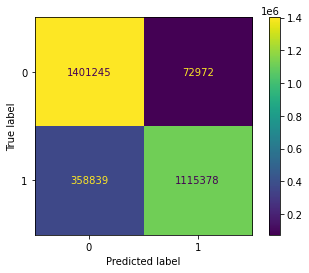



Confusion matrix for the test set
[[350347  18179]
 [   471   1482]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


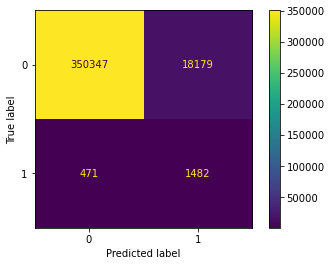

In [267]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_sm_train,y_pred_train_log))
plot_confusion_matrix(log,X_sm_train,y_sm_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test,y_test, values_format = 'd')
plt.show()

In [268]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm_train, y_pred_train_knn),
                                         precision_score(y_sm_train, y_pred_train_knn),
                                         recall_score(y_sm_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,1.00,0.99
1,Precision,1.00,0.43
2,Recall,1.00,0.71


Confusion matrix for the train set
[[1469407    4810]
 [    390 1473827]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


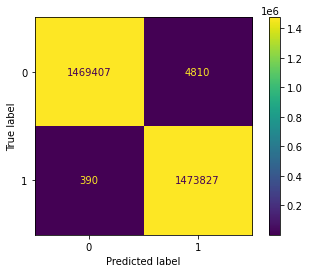



Confusion matrix for the test set
[[366662   1864]
 [   557   1396]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


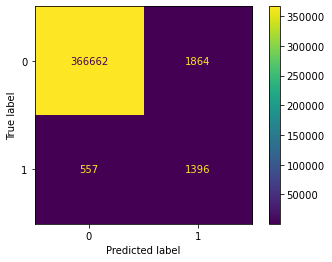

In [269]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_sm_train,y_pred_train_knn))
plot_confusion_matrix(KNN,X_sm_train,y_sm_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(KNN,X_test,y_test, values_format = 'd')
plt.show()

In [270]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()

model4 = RandomForestClassifier()

model_pipeline = [model1, model2, model3, model4]
model_names = ['Decision Tree', 'Logistic Regression', 'KNN','Random Forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

{'Decision Tree': 0.9958135250672271, 'Logistic Regression': 0.9948053700785808, 'KNN': 0.995133324111032, 'Random Forest': 0.9974728645030249}
